<a href="https://colab.research.google.com/github/hong126-ch/CIS5450/blob/main/11_Module_3_Part_1_Data_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lecture Notebook: Information Visualization


This notebook covers several things:

1. The basics of plotting Pandas dataframes using matplotlib.
2. Some rules of thumb about bar vs line charts, axes, normalization, and whether to interpolate.
3. Basics of ggplot on Python
4. Seaborn and visualization of statistical data

## Autograder setup!


In [1]:
#PLEASE ENSURE YOUR PENN-ID IS ENTERED CORRECTLY. IF NOT, THE AUTOGRADER WON'T KNOW WHO
#TO ASSIGN POINTS TO YOU IN OUR BACKEND
STUDENT_ID = 64660501 # YOUR PENN-ID GOES HERE AS AN INTEGER##PLEASE ENSURE YOUR PENN-ID IS ENTERED CORRECTLY. IF NOT, THE AUTOGRADER WON'T KNOW WHO

In [2]:
%%writefile notebook-config.yaml

grader_api_url: 'https://23whrwph9h.execute-api.us-east-1.amazonaws.com/default/Grader23'
grader_api_key: 'flfkE736fA6Z8GxMDJe2q8Kfk8UDqjsG3GVqOFOa'

Writing notebook-config.yaml


In [3]:
%set_env HW_ID=cis5450_25f_HW9

env: HW_ID=cis5450_25f_HW9


In [4]:
!pip3 install penngrader-client

In [5]:
import os
from penngrader.grader import *

grader = PennGrader('notebook-config.yaml', os.environ['HW_ID'], STUDENT_ID, STUDENT_ID)

PennGrader initialized with Student ID: 64660501

Make sure this correct or we will not be able to store your grade


## Initialize Visualization Libraries

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Loading familiar data into Pandas

We'll use the CEOs dataset from Wikipedia as an example to compare two different sub-populations: those CEOs who are actually **founders**, and those who are simply "**regular CEOs**".

In [7]:
import requests
from io import StringIO

def import_html(url: str):
  # Now let's read an HTML table!
  headers = {
      'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'
  }

  return requests.get(url, headers=headers).text


In [8]:
# Read the Wikipedia HTML table containing information about CEOs!

url = 'https://en.wikipedia.org/wiki/List_of_chief_executive_officers#List_of_CEOs'
company_ceos_df = pd.read_html(StringIO(import_html(url)))[1]



In [9]:
company_ceos_df

,Company,Executive,Title,Since,Notes,Updated
0,Accenture,Julie Sweet,CEO[1],2019,Succeeded Pierre Nanterme following his death,2019-01-31
1,Aditya Birla Group,Kumar Mangalam Birla,Chairman[2],1995[2],Part of the Birla family business house in India,2018-10-01
2,Adobe Systems,Shantanu Narayen,"Chairman, president and CEO[3]",2007,Formerly with Apple,2018-10-01
3,Airbus,Guillaume Faury,CEO[4],2012,Succeeded Louis Gallois,2017-11-14
4,Alibaba,Eddie Wu,Director and CEO[5],2023[6],NaN,2024-07-19
...,...,...,...,...,...,...
134,Warner Brothers,Ann Sarnoff,Chairwoman and CEO[124],2019,First woman to hold the position at the compan...,2019-10-10
135,WarnerMedia,Jason Kilar,CEO[125],2020,Previously with Hulu and Amazon,2020-11-19
136,Wells Fargo,Charles Scharf,CEO and president[126],2019,"Succeeded John Stumpf, previously COO",NaN
137,Whole Foods Market,John Mackey,CEO[127],1980,Co-founder,2017-11-11


In [10]:

company_ceos_df.dropna(subset = ['Since'], inplace=True)
# Clean the references out of the Since field and the Title field...
company_ceos_df['Since'] = company_ceos_df['Since'].apply(lambda x: int(x.split(' ')[-1]) if not pd.isna(x) and ' ' in x else x)
company_ceos_df['Since'] = company_ceos_df['Since'].apply(lambda x: int(x.split('[')[0].strip()) if (not pd.isna(x)) and isinstance(x, str) and '[' in x else int(x))
company_ceos_df['Title'] = company_ceos_df['Title'].apply(lambda x: x.split('[')[0].strip() if '[' in x else x)

for i in range(0,len(company_ceos_df)):
  print(company_ceos_df.iloc[i]['Executive'] + ': ' + str(company_ceos_df.iloc[i]['Since']))
# Show the output
company_ceos_df.info()

Julie Sweet: 2019
Kumar Mangalam Birla: 1995
Shantanu Narayen: 2007
Guillaume Faury: 2012
Eddie Wu: 2023
Andy Jassy: 2021
Lisa Su: 2014
Stephen Squeri: 2018
Joseph R. Swedish: 2013
Tim Cook: 2011
Aditya Mittal: 2006
John Stankey: 2020
Charles Woodburn: 2008
Tapan Singhel: 2012
Carlos Torres Vila: 2015
Brian Moynihan: 2009
C.S. Venkatakrishnan: 2021
Warren Buffett: 1970
Hubert Joly: 2012
Sunil Bharti Mittal: 1985
Stephen A. Schwarzman: 1985
Mike Henry: 2020
Oliver Zipse: 2020
Kelly Ortberg: 2024
Rich Lesser: 2013
Bob Dudley: 2010
Hock Tan: 2006
Denise Morrison: 2011
Mark Shuttleworth: 2017
Richard Fairbank: 1988
Jim Umpleby: 2017
Evan Greenberg: 2004
Chuck Robbins: 2015
Jane Fraser: 2021
James Quincey: 2008
Thomas Gottstein: 2015
Ola Källenius: 2019
Michael Dell: 1984
Ed Bastian: 2016
Christian Sewing: 2018
Tobias Meyer: 2019
Edward D. Breen: 2015
Devin Wenig: 2015
Börje Ekholm: 2017
Darren Woods: 2017
Carmine Di Sibio: 2019
Mark Zuckerberg: 2004
Raj Subramaniam: 2022
Sergio Marchionne:

Now that we have the data, let's split into two dataframes.

In [11]:
# Split the founders
founders_df = company_ceos_df[company_ceos_df['Title'].apply(lambda s: True if 'founder' in s.lower() else False)]

# This is a set difference: we keep only items that are duplicated
regular_ceos_df = pd.concat([company_ceos_df, founders_df]).drop_duplicates(keep=False)

In [12]:
# For inspection: who are non-founders?
regular_ceos_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 132 entries, 0 to 138
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Company    132 non-null    object
 1   Executive  132 non-null    object
 2   Title      132 non-null    object
 3   Since      132 non-null    int64 
 4   Notes      129 non-null    object
 5   Updated    129 non-null    object
dtypes: int64(1), object(5)
memory usage: 7.2+ KB


In [13]:
# For inspection: who are non-founders?

founders_df

,Company,Executive,Title,Since,Notes,Updated
19,Bharti Enterprises,Sunil Bharti Mittal,Founder and chairman,1985,Founder of the firm,2018-10-01
20,Blackstone Group,Stephen A. Schwarzman,"Chairman, CEO and co-founder",1985,Co-founded the firm with Peter George Peterson,2017-11-15
28,Canonical,Mark Shuttleworth,Founder and CEO,2017,Stepped down as CEO in 2009 and resumed in 2017,2017-11-14
29,Capital One Financial,Richard Fairbank,"Founder, chairman and CEO",1988,Co-founded the firm with Nigel Morris,2017-11-14
109,SpaceX,Elon Musk,"Founder, chairman, CEO, CTO",2002,NaN,2024-10-19
117,TCL Corporation,Li Dongsheng,CEO and founder,1981,Been with the company since the beginning,NaN


## Plotting our first graph

OK, so we'll do our first plot.  We want to see company vs CEO start year, for CEOs who are also founders.  This is a *bar chart* since companies are categorical rather than continuous-valued.

<Axes: xlabel='Company'>

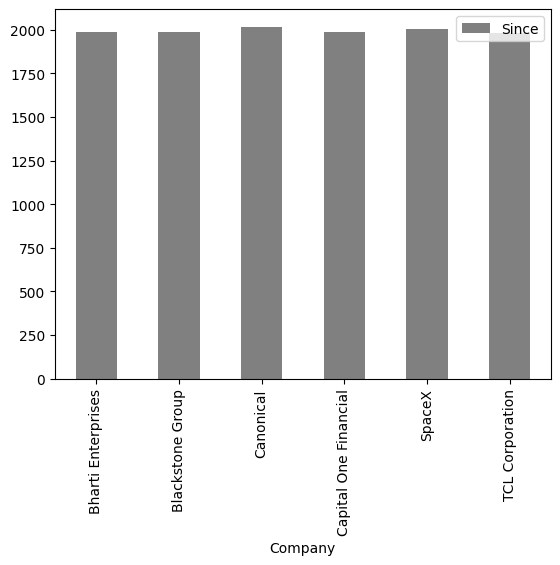

In [14]:
founders_df.plot(kind='bar', x='Company', y='Since', color='gray')


This looks pretty ridiculous, because the assumption is that dates start at 0, and that we are measuring dates!  

Could we change the graphed value to that conceptually makes more sense, e.g., maybe we should look at **how long** people have been CEOs?

/tmp/ipython-input-779390843.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  founders_df['Years'] = founders_df['Since'].apply(lambda x: now.year - x)


(0.0, 70.0)

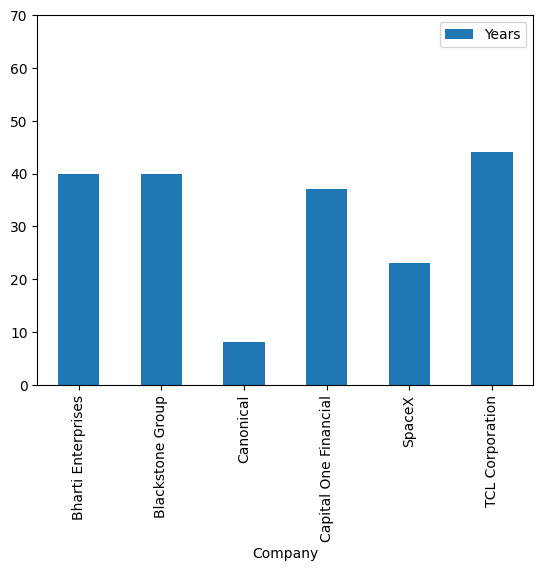

In [15]:
import datetime
now = datetime.datetime.now()

founders_df['Years'] = founders_df['Since'].apply(lambda x: now.year - x)

fig = founders_df.plot(kind='bar', x='Company', y='Years')


# Based on "domain expertise", we will assume no one should be CEO for more
# than ~70 years -- if they started at 20, they would be 90...
fig.set_ylim([0, 70])

## Plotting for comparison

Let's look at how many folks founded companies in each year, comparing founding CEOs vs "regular" CEOs...

Here, year can be considered a continuous-valued parameter (although note that we are actually quantizing it to integer values, so fractional years aren't really useful here).

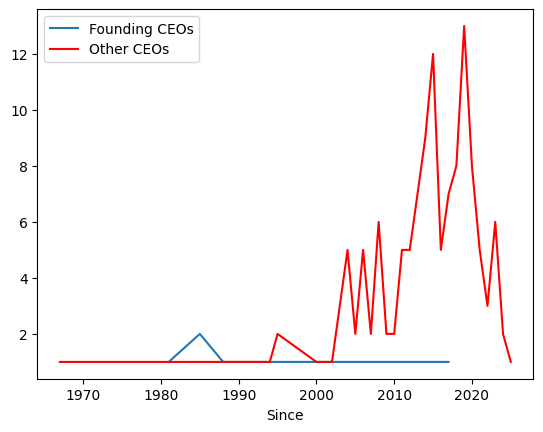

In [16]:

# gca stands for 'get current axis'
ax = plt.gca()

# This will create counts for how many founders started in each year
founders_by_year = founders_df.groupby(['Since']).count()

founder = founders_by_year.plot(kind='line',y='Company',ax=ax, label='Founding CEOs')
regular_ceos_by_year = regular_ceos_df.groupby(['Since']).count()

regular = regular_ceos_by_year.plot(kind='line',y='Company', color='red', ax=ax, \
                                    label='Other CEOs')




If we look closely at this graph, we'll note there seems to be one founding CEO every year. Could that be?  Maybe we should look more closely!!!

We'll re-plot, putting a marker at each point.  And perhaps we can even remove the line from the "founding CEO" plot, just looking at the markers...

Text(0.5, 0, 'Year CEO started')

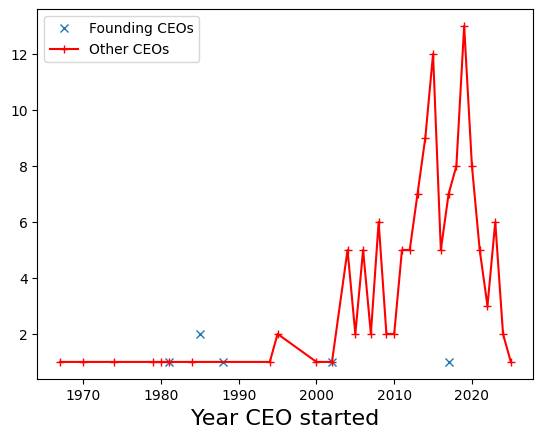

In [17]:

# gca stands for 'get current axis' and if we share the x-axis,
# we will be able to plot multiple items against it
ax = plt.gca()

# This will create counts for how many founders started in each year
founders_by_year = founders_df.groupby(['Since']).count()

founder = founders_by_year.plot(kind='line',y='Company',ax=ax, label='Founding CEOs',
                                marker='x', linewidth=0)
regular_ceos_by_year = regular_ceos_df.groupby(['Since']).count()

regular = regular_ceos_by_year.plot(kind='line',y='Company', color='red', ax=ax,
                                    label='Other CEOs', marker='+')

plt.xlabel('Year CEO started', fontsize = 16)


Much clearer -- in fact the blue x's show that founding CEOs are not that common!

## Plotting and Thinking about Scale

Let's try another plot, here comparing three items...

<Axes: xlabel='scale'>

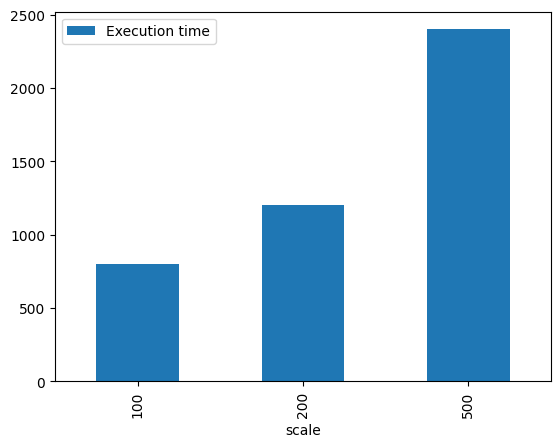

In [18]:
graph_df = pd.DataFrame([{'scale': 100, 'value': 800}, {'scale': 200, 'value': 1200}, {'scale': 500, 'value': 2400}])

graph_df.plot(kind='bar', x='scale', y='value', label='Execution time')


This plot is perfectly fine, but note that the x-axis actually contains **numeric** items, which might be continuous-valued.  Moreover, there is neither a log-scale nor a linear-scale progression along the axis -- so while our eyes see something that looks non-linear, in fact we can plot this as a line chart and see what's really happening...

<Axes: xlabel='scale'>

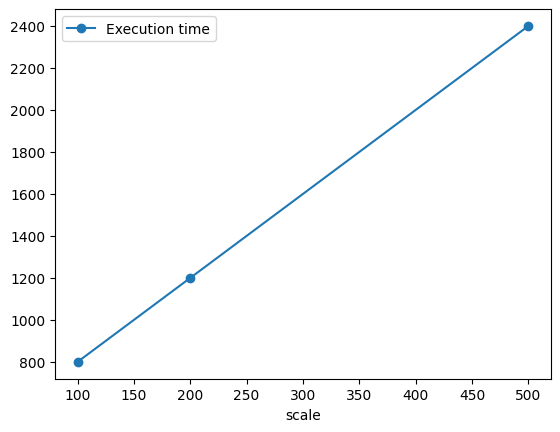

In [19]:
graph_df.plot(kind='line', x='scale', y='value', label='Execution time', marker='o')


## Plotting and Normalization

Now let's look at data and scaling, where perhaps we are looking at phenomena that are quite different.  A common situation is to measure the running time of three computations, using some baseline computation and comparing it with some alternate computation.  We can plot this using bar charts as we see below.

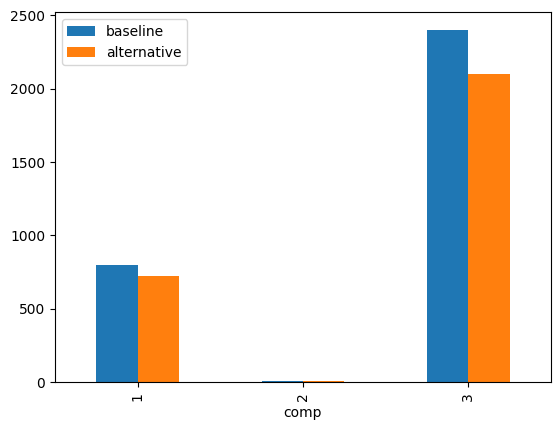

In [20]:
# Suppose we are counting, for three computations, two different components, the
# baseline computation and the alternative.

# These are the "baseline" numbers for some computation
baseline_df = pd.DataFrame([{'comp': 1, 'value': 800}, {'comp': 2, 'value': 5}, {'comp': 3, 'value': 2400}])
# These are alternative computations
alternative_df = pd.DataFrame([{'comp': 1, 'value': 720}, {'comp': 2, 'value': 3}, {'comp': 3, 'value': 2100}])

# We want to plot side-by-side
combined_df = baseline_df.rename(columns={'value': 'baseline'})
combined_df['alternative'] = alternative_df['value']

fig = combined_df.plot.bar(x='comp')



Wow, we can't see computation #2 at all!  Given that each plot is very different, we may want to normalize each...

Text(0.5, 1.0, 'Normalized Performance')

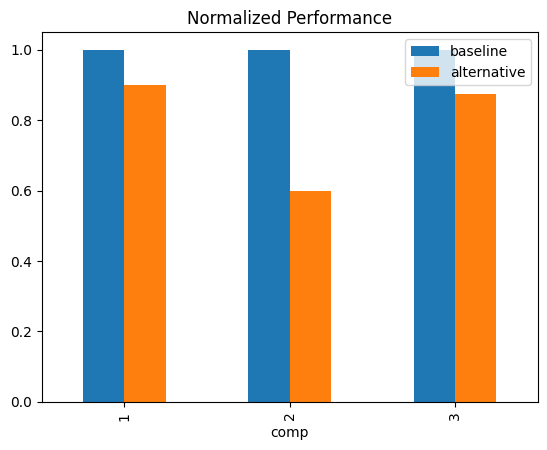

In [21]:
rescaled_df = combined_df.copy()
rescaled_df['alternative'] = combined_df.apply(lambda r: r['alternative'] / r['baseline'], axis=1)
rescaled_df['baseline'] = combined_df.apply(lambda r: 1.0, axis=1)

fig = rescaled_df.plot(kind='bar', x='comp')
fig.set_title('Normalized Performance')


Note that an "honest" presentation of the data will emphasize that these are normalized, and that the relative running times are quite different.  In fact, sometimes people will put a caption above each bar showing the actual timings.

# Visualization of Statistical Data with Seaborn

In [22]:
!pip install seaborn

import seaborn as sb

In [23]:
# Some simple data, random points around a line
points = 150
slope = 0.3

x = np.array(range(points))
# We'll plot these
y = np.random.randn(points) * 5 + x * slope
# Choose a random integer, set z to True if it's positive, else set z to False
z = map(lambda x: x >= 0, np.random.randn(points))

sample_df = pd.DataFrame({'x': x, 'y': y, 'z': z})

sample_df

,x,y,z
0,0,-2.560355,False
1,1,-9.487326,True
2,2,-6.266822,True
3,3,5.687930,True
4,4,-5.996415,True
...,...,...,...
145,145,39.470226,True
146,146,44.815266,True
147,147,44.384121,True
148,148,39.803980,True


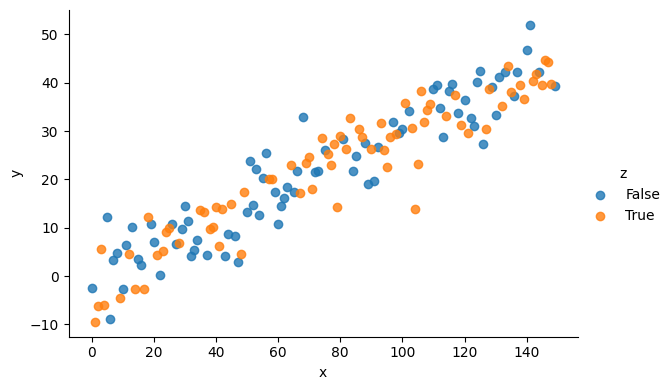

In [24]:
# Do a scatter plot, with height 4, shading the points based on whether z is True
sb.lmplot(data=sample_df, x='x', y='y', height=4, aspect=1.5, fit_reg=False, hue="z")


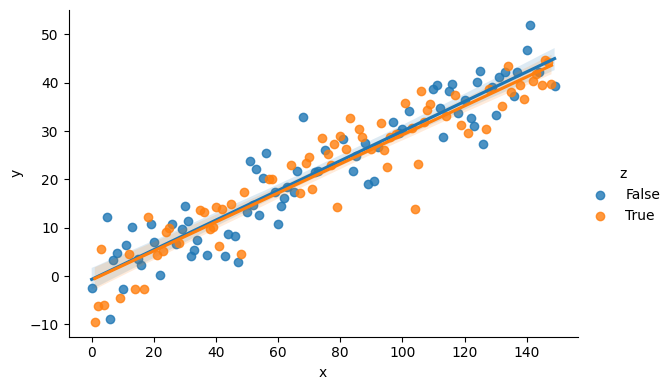

In [25]:
# Do a scatter plot, with height 4, shading the points based on whether z is True
sb.lmplot(data=sample_df, x='x', y='y', height=4, aspect=1.5, fit_reg=True, hue="z")

In [26]:
# Sample dataset with people + tips
tips_dataset = sb.load_dataset('tips')

tips_dataset

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


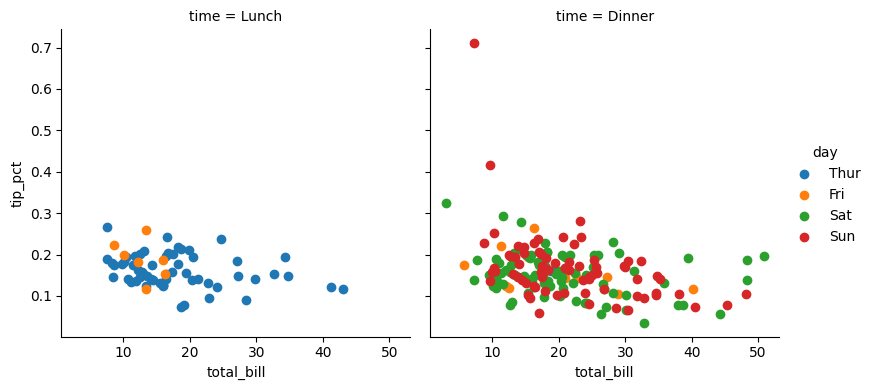

In [27]:
# Sample dataset with people + tips
tips_dataset = sb.load_dataset('tips')

# The question: how do people tip on different days of the week?
tips_dataset['tip_pct'] = tips_dataset.apply(lambda r: r['tip'] / r['total_bill'], axis=1)

# We will create a different graph for each value of 'time' (lunch vs dinner)
g = sb.FacetGrid(tips_dataset, col='time', hue='day',
                 height=4, aspect=1)

# Within each graph, plot total bill vs tip
g.map(plt.scatter, 'total_bill', 'tip_pct')
g.add_legend()

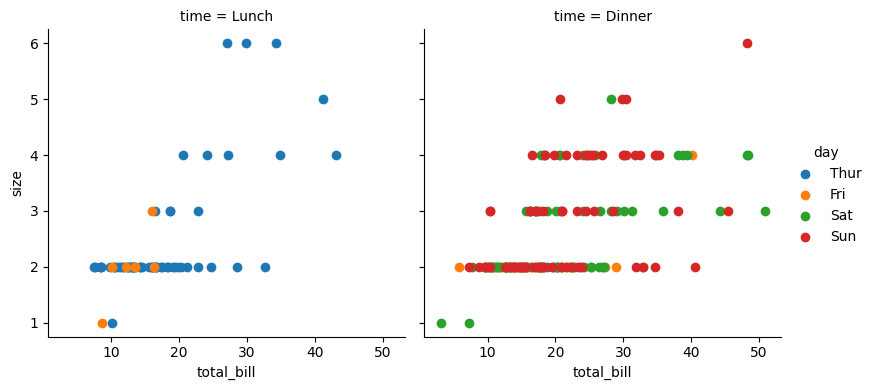

In [28]:
# We will create a different graph for each value of 'time' (lunch vs dinner)
g = sb.FacetGrid(tips_dataset, col='time', hue='day',
                 height=4, aspect=1)

# Within each graph, plot total bill vs tip
g.map(plt.scatter, 'total_bill', 'size')
g.add_legend()

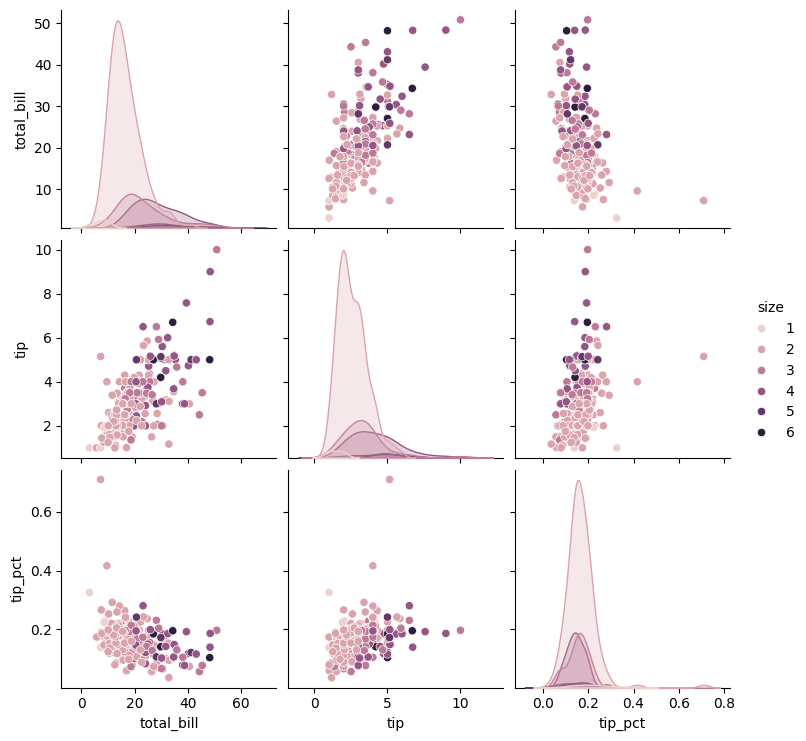

In [29]:
# Let's look at how different factors are influenced by the size
# of the party
sb.pairplot(data=tips_dataset,kind='scatter', hue='size')

In [30]:
# Create histogram bins of size 5
bins = np.arange(tips_dataset.total_bill.min(), tips_dataset.total_bill.max(), 5)

# Cut the bins, and group by size
by_bill_binned = tips_dataset.groupby([pd.cut(tips_dataset.total_bill, bins, precision=0),
                                       'size']).size().unstack().fillna(0)

by_bill_binned

/tmp/ipython-input-1051393338.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  by_bill_binned = tips_dataset.groupby([pd.cut(tips_dataset.total_bill, bins, precision=0),


size,1,2,3,4,5,6
total_bill,,,,,,
"(3.0, 8.0]",1,5,0,0,0,0
"(8.0, 13.0]",2,46,2,0,0,0
"(13.0, 18.0]",0,57,12,2,0,0
"(18.0, 23.0]",0,29,9,8,1,0
"(23.0, 28.0]",0,11,5,11,0,1
"(28.0, 33.0]",0,6,5,5,3,1
"(33.0, 38.0]",0,1,2,5,0,1
"(38.0, 43.0]",0,1,0,3,1,0
"(43.0, 48.0]",0,0,2,1,0,0


<Axes: xlabel='size', ylabel='total_bill'>

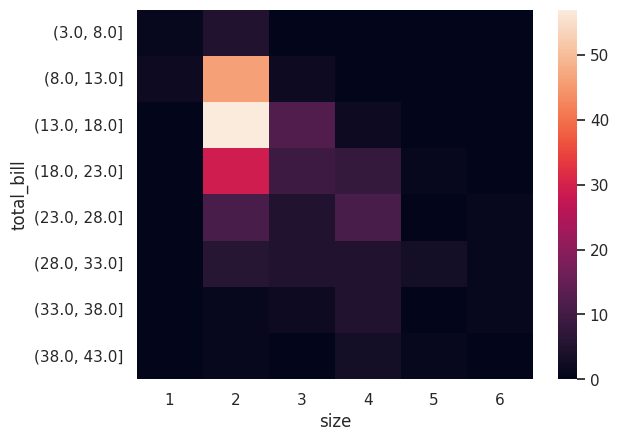

In [31]:
sb.set(font_scale=1.0)

sb.heatmap(by_bill_binned[by_bill_binned.sum(axis=1) > 3])

<Axes: xlabel='time', ylabel='total_bill'>

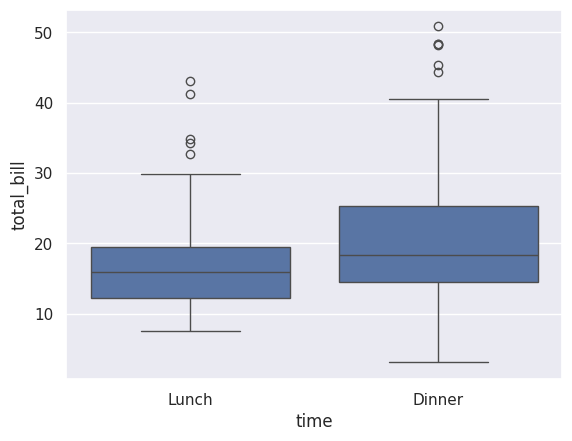

In [32]:
sb.boxplot(x=tips_dataset.time, y=tips_dataset.total_bill)

In [33]:
tips_dataset.total_bill.sort_values()

,total_bill
67,3.07
92,5.75
111,7.25
172,7.25
149,7.51
...,...
182,45.35
156,48.17
59,48.27
212,48.33


## Exercise

### Are we confident lunch and dinner have different price distributions?

We talked about the *t-test* as a way of comparing whether two distributions have different means.  Let us compare lunch vs. dinner `total_bill` and see what the *p-value* is, with regards to refuting the null hypothesis (establishing the distibutions are different).  You should threshold to the standard level of significance used in the sciences.



In [35]:
from scipy import stats

# Separate the total bills for lunch and dinner
lunch_bills = tips_dataset[tips_dataset['time'] == 'Lunch']['total_bill']
dinner_bills = tips_dataset[tips_dataset['time'] == 'Dinner']['total_bill']

# Perform the independent samples t-test, see https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html
# TODO
t_statistic, p_value = stats.ttest_ind(lunch_bills, dinner_bills)

# Print the results
print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")

# Interpret the results
alpha = 0.05
if p_value < alpha:
  grader.grade(test_case_id='lunch', answer=True)
else:
  grader.grade(test_case_id='lunch', answer=False)


T-statistic: -2.8976375218366424
P-value: 0.004104621407595674
Correct! You earned 1/1 points. You are a star!

Your submission has been successfully recorded in the gradebook.
